<a href="https://colab.research.google.com/github/DhakalSumi/Computer-Vision-Project-/blob/main/ComputerVision_Project_Sumi_01_04_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR-10**

What is this dataset about? Here are the key facts about it:

It consists of 60000 32x32 colour images.

This data offers 10 classes for classification, with 6000 images per class.

There are 50000 training images and 10000 test images.

Here are the classes in the dataset, as well as 10 random images from each.

In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
#Import all the necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
n = 10000

train_images = train_images[:n]
train_labels = train_labels[:n]

In [6]:
print(train_images)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [7]:
print(train_images.shape)

(10000, 32, 32, 3)


In [8]:
# Normalize pixel values to [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

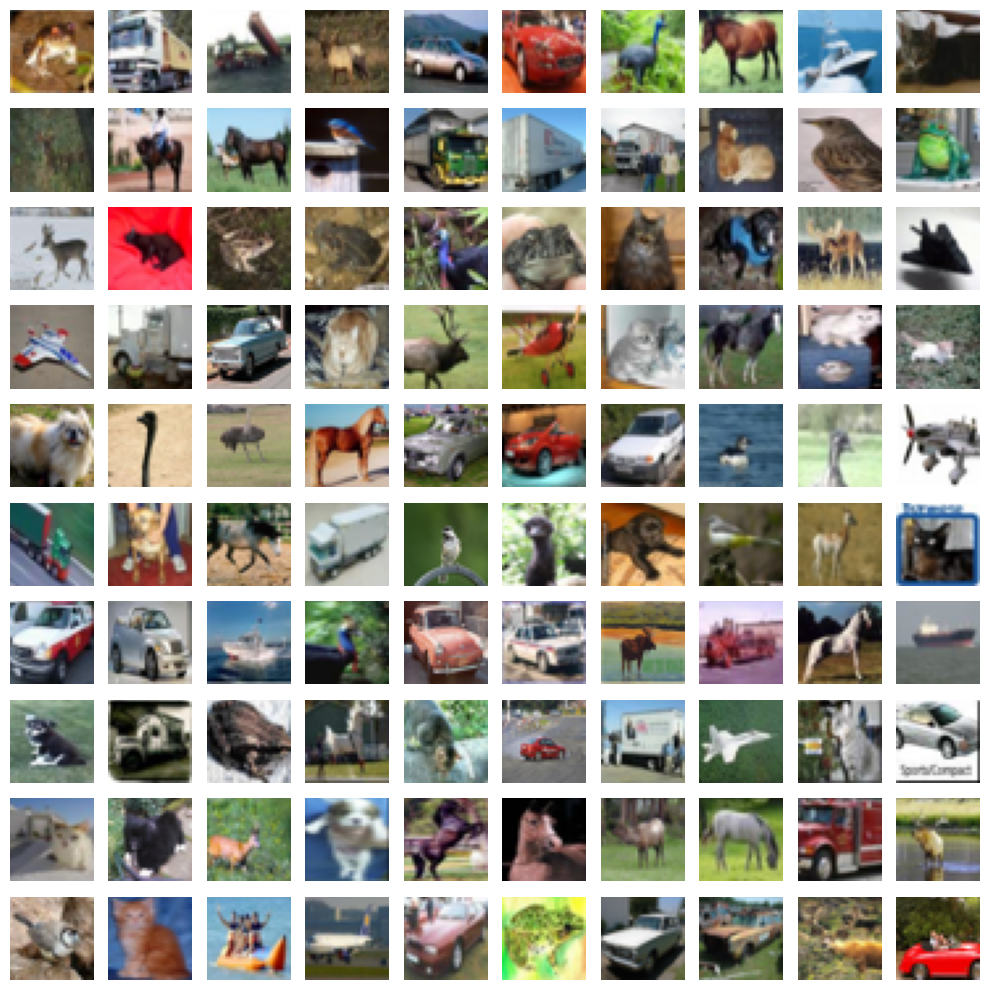

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(train_images[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.applications import ResNet50

In [12]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Build custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

In [14]:
# Define model
model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the head of the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 458ms/step - accuracy: 0.1101 - loss: 2.4838 - val_accuracy: 0.1008 - val_loss: 2.3025
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 191s 422ms/step - accuracy: 0.1081 - loss: 2.2988 - val_accuracy: 0.1337 - val_loss: 2.2869
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 304ms/step - accuracy: 0.1105 - loss: 2.2976 - val_accuracy: 0.1290 - val_loss: 2.2720
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 439ms/step - accuracy: 0.1138 - loss: 2.2899 - val_accuracy: 0.1593 - val_loss: 2.2650
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 424ms/step - accuracy: 0.1328 - loss: 2.2818 - val_accuracy: 0.1590 - val_loss: 2.2545
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 311ms/step - accuracy: 0.1269 - loss: 2.2826 - val_accuracy: 0.1524 - val_loss: 2.2614
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 176s 422ms/step - accuracy: 0.1287 - loss: 2.2739 - val_accuracy: 0.1609 - val_loss: 2.2341
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 422ms/step - accuracy: 0.1280 -

In [16]:
# Unfreeze the base model and fine-tune the entire model
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the full model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 918s 3s/step - accuracy: 0.1971 - loss: 2.7940 - val_accuracy: 0.1018 - val_loss: 19.6250
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 899s 3s/step - accuracy: 0.4751 - loss: 1.5240 - val_accuracy: 0.0768 - val_loss: 3.7394
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 907s 3s/step - accuracy: 0.6129 - loss: 1.1488 - val_accuracy: 0.4908 - val_loss: 1.4732
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 880s 3s/step - accuracy: 0.7058 - loss: 0.8876 - val_accuracy: 0.6561 - val_loss: 1.0970
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 958s 3s/step - accuracy: 0.7504 - loss: 0.7531 - val_accuracy: 0.6653 - val_loss: 1.0612
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 921s 3s/step - accuracy: 0.7889 - loss: 0.6218 - val_accuracy: 0.6729 - val_loss: 1.0553
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 924s 3s/step - accuracy: 0.8360 - loss: 0.5083 - val_accuracy: 0.6893 - val_loss: 1.0580
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 923s 3s/step - accuracy: 0.8554 - loss: 0.4313 - val_acc

In [18]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.7002 - loss: 1.0849
Test Accuracy: 69.70%


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 890s 3s/step - accuracy: 0.9122 - loss: 0.2754 - val_accuracy: 0.7039 - val_loss: 1.1954
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 932s 3s/step - accuracy: 0.9281 - loss: 0.2372 - val_accuracy: 0.7153 - val_loss: 1.1598
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 921s 3s/step - accuracy: 0.9334 - loss: 0.2123 - val_accuracy: 0.6979 - val_loss: 1.3373
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 923s 3s/step - accuracy: 0.9396 - loss: 0.2115 - val_accuracy: 0.7131 - val_loss: 1.1647
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 909s 3s/step - accuracy: 0.9448 - loss: 0.1833 - val_accuracy: 0.7172 - val_loss: 1.2217
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 912s 3s/step - accuracy: 0.9525 - loss: 0.1640 - val_accuracy: 0.7180 - val_loss: 1.2390
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 916s 3s/step - accuracy: 0.9595 - loss: 0.1352 - val_accuracy: 0.7240 - val_loss: 1.2347
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 899s 3s/step - accuracy: 0.9589 - loss: 0.1334 - val_accu

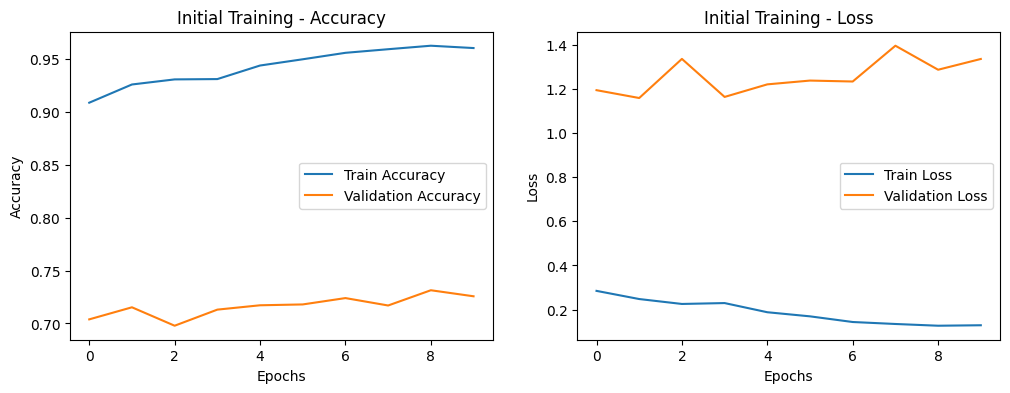

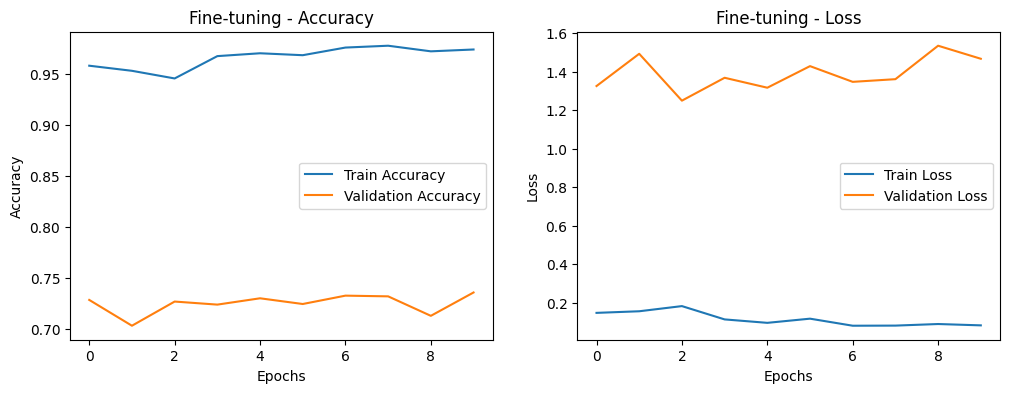

In [19]:
# Train the head of the model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

# Unfreeze the base model and fine-tune the entire model
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the full model
history_finetune = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')

    plt.show()

plot_history(history, 'Initial Training')
plot_history(history_finetune, 'Fine-tuning')